### 주제 : 2023년 서울 가맹점 업종별 매출액 및 순이익 분석
- 지역 및 업종별 가맹점 매출액 분석
- 지역 및 업종별 가맹점 순이익(매출액-영업비용) 분석

In [15]:
# 패키지로딩하기 : 패키지를 메모리에 올리는 기능
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [8]:
# 그래프의 한글 깨짐 처리
plt.rcParams["font.family"] = "Malgun Gothic"

In [46]:
# 데이터 읽어오기
df = pd.read_excel("D:/SEOUL/프랜차이즈_통계_가맹점__20250917093120.xlsx", sheet_name="데이터")
print(df.shape)  # 행과 열의 수
df.head()  # 첫 5개만 보기

(306, 11)


,시도별,주요 업종별,사업체수 (개),종사자수 (명),매출액 (백만원),영업비용 (백만원),매출원가 (백만원),인건비 (백만원),임차료 (백만원),기타영업비용 (백만원),연간급여액 (백만원)
0,전국,합계,301885,1016364,109057852,101015803,58717635,14199572,6458016,21640580,13306493
1,전국,체인화 편의점,54828,210928,27851708,27655858,19505905,2523576,871150,4755227,2328018
2,전국,문구용품 및 회화용품 소매업,2388,4848,833098,756008,546243,68582,42969,98213,58117
3,전국,의약품 및 의료용품 소매업,4885,15223,6494382,5883905,4933636,381006,173757,395505,360095
4,전국,안경 및 렌즈 소매업,3998,9548,1530750,1355586,729934,214529,156030,255094,192470


In [34]:
# 컬럼명을 원하는 구성으로 변경
df.columns = [col.replace(" (개)", "").replace(" (명)", "").replace(" (백만원)", "") for col in df.columns]
df.columns

Index(['시도별', '주요 업종별', '사업체수', '종사자수', '매출액', '영업비용', '매출원가', '인건비', '임차료',
       '기타영업비용', '연간급여액'],
      dtype='object')

In [35]:
display(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도별     306 non-null    object
 1   주요 업종별  306 non-null    object
 2   사업체수    306 non-null    int64 
 3   종사자수    306 non-null    int64 
 4   매출액     306 non-null    int64 
 5   영업비용    306 non-null    int64 
 6   매출원가    306 non-null    int64 
 7   인건비     306 non-null    int64 
 8   임차료     306 non-null    int64 
 9   기타영업비용  306 non-null    int64 
 10  연간급여액   306 non-null    int64 
dtypes: int64(9), object(2)
memory usage: 26.4+ KB


None

,사업체수,종사자수,매출액,영업비용,매출원가,인건비,임차료,기타영업비용,연간급여액
count,306.000000,3.060000e+02,3.060000e+02,3.060000e+02,3.060000e+02,3.060000e+02,3.060000e+02,3.060000e+02,3.060000e+02
mean,3946.209150,1.328580e+04,1.425593e+06,1.320468e+06,7.675508e+05,1.856153e+05,8.441854e+04,2.828834e+05,1.739411e+05
std,18888.965496,6.412446e+04,6.922700e+06,6.433479e+06,3.778589e+06,9.001580e+05,4.110458e+05,1.370779e+06,8.441288e+05
min,24.000000,5.700000e+01,4.554000e+03,3.999000e+03,9.340000e+02,1.260000e+02,3.430000e+02,8.630000e+02,2.400000e+01
25%,211.250000,6.040000e+02,8.101975e+04,7.084975e+04,3.634375e+04,1.047625e+04,4.199750e+03,1.485000e+04,9.415250e+03
50%,677.000000,2.050500e+03,2.051710e+05,1.823860e+05,9.669150e+04,2.650600e+04,1.062850e+04,4.045300e+04,2.401300e+04
75%,1764.000000,5.676500e+03,5.896928e+05,5.413375e+05,3.049570e+05,7.453275e+04,3.529725e+04,1.233075e+05,7.194975e+04
max,301885.000000,1.016364e+06,1.090579e+08,1.010158e+08,5.871764e+07,1.419957e+07,6.458016e+06,2.164058e+07,1.330649e+07


In [54]:
for i, col in enumerate(df.columns): print(i, repr(col))

0 '시도별'
1 '주요 업종별'
2 '사업체수 (개)'
3 '종사자수 (명)'
4 '매출액 (백만원)'
5 '영업비용 (백만원)'
6 '매출원가 (백만원)'
7 '인건비 (백만원)'
8 '임차료 (백만원)'
9 '기타영업비용 (백만원)'
10 '연간급여액 (백만원)'


### 서울특별시 가맹점 매출액 분석 : 히스토그램, 상자그림, 바이올린 그래프 그리기
- 서울특별시 가맹점 매출액은 대다수가 낮은 매출액 구간에 몰려 있음.
- 하지만 일부 업종 또는 일부 기업은 매우 큰 매출액을 기록하고 있어서, 
  전체 분포가 극단적으로 치우친(우측 편향) 모습을 보입니다.
  따라서 단순 평균보다는 중앙값/사분위수로 분석하는 게 더 적절합니다.
- 업종별로 구분해서 보면 “대부분 업종은 비슷하게 낮은 매출을 내고, 특정 업종이 특출나게 크다” 는 구조일 가능성이 큽니다.

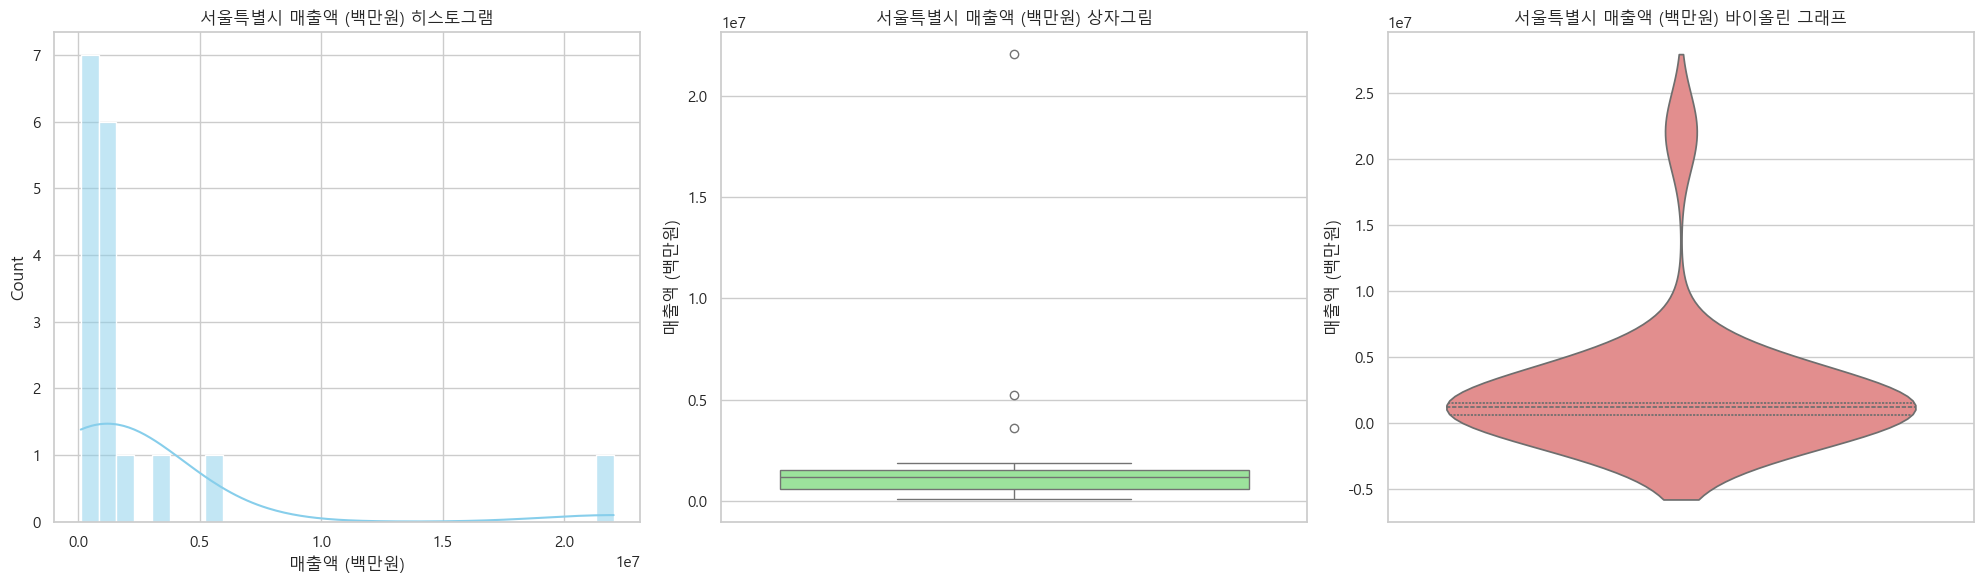

In [51]:
# 1. 엑셀 파일 불러오기
df = pd.read_excel("D:/SEOUL/프랜차이즈_통계_가맹점__20250917093120.xlsx", sheet_name=0)

# 2. 서울특별시 데이터만 필터링
seoul_df = df[df["시도별"] == "서울특별시"]

# 3. 분석할 변수 지정 (예: 매출액)
target_col = "매출액 (백만원)"   # 다른 변수: "종사자수 (명)", "인건비 (백만원)" 등 가능

# 4. 시각화 스타일 설정
sns.set(style="whitegrid", font="Malgun Gothic")  # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False        # 음수 기호 깨짐 방지

# 5. 1행 3열 subplot 생성
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# (1) 히스토그램
sns.histplot(seoul_df[target_col], kde=True, ax=axes[0], color="skyblue")
axes[0].set_title(f"서울특별시 {target_col} 히스토그램")
axes[0].set_xlabel(target_col)

# (2) 상자그림
sns.boxplot(y=seoul_df[target_col], ax=axes[1], color="lightgreen")
axes[1].set_title(f"서울특별시 {target_col} 상자그림")
axes[1].set_ylabel(target_col)

# (3) 바이올린 그래프
sns.violinplot(y=seoul_df[target_col], ax=axes[2], inner="quartile", color="lightcoral")
axes[2].set_title(f"서울특별시 {target_col} 바이올린 그래프")
axes[2].set_ylabel(target_col)

# 6. 출력
plt.tight_layout()
plt.show()

### 서울특별시 업종별 매출액 분포 : 히스토그램, 상자그림, 바이올린 그래프

-히스토그램 : 서울시 업종별 매출액 분포는 전형적인 우측 편향(Positive Skew) 구조입니다.
             대부분 업종은 낮은 매출액 구간에 몰려 있고, 소수 업종만 아주 큰 매출액을 기록하는 불균형적인 시장 구조를 보여줍니다.
             따라서 단순히 평균으로 비교하면 큰 매출을 가진 업종이 전체를 왜곡할 수 있기 때문에, 중앙값/사분위수 기반 비교가 필요합니다.   

-상자그림   : 각 업종의 매출액 분포를 중앙값·사분위수·이상치로 보여줍니다.
             대부분 업종은 매출액이 낮은 범위에 몰려 있습니다.
             하지만 “합계” 항목이나 일부 업종은 극단적으로 큰 값이 있어서, 다른 업종들의 상자가 바닥에 붙은 것처럼 보입니다.

-바이올린 플롯 : 상자그림의 정보에 더해, 각 업종별 매출액의 분포 밀도를 표현합니다.
                대부분 업종에서 매출액 분포가 아래쪽(저매출) 구간에 밀집되어 있고, 위쪽 꼬리 부분은 매우 얇습니다.
                즉, 대부분은 소규모 매출, 극소수만 대규모 매출이라는 구조입니다.

C:\Users\NT551\AppData\Local\Temp\ipykernel_1516\836060313.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="주요 업종별", bbox_to_anchor=(1.05, 1), loc='upper left')


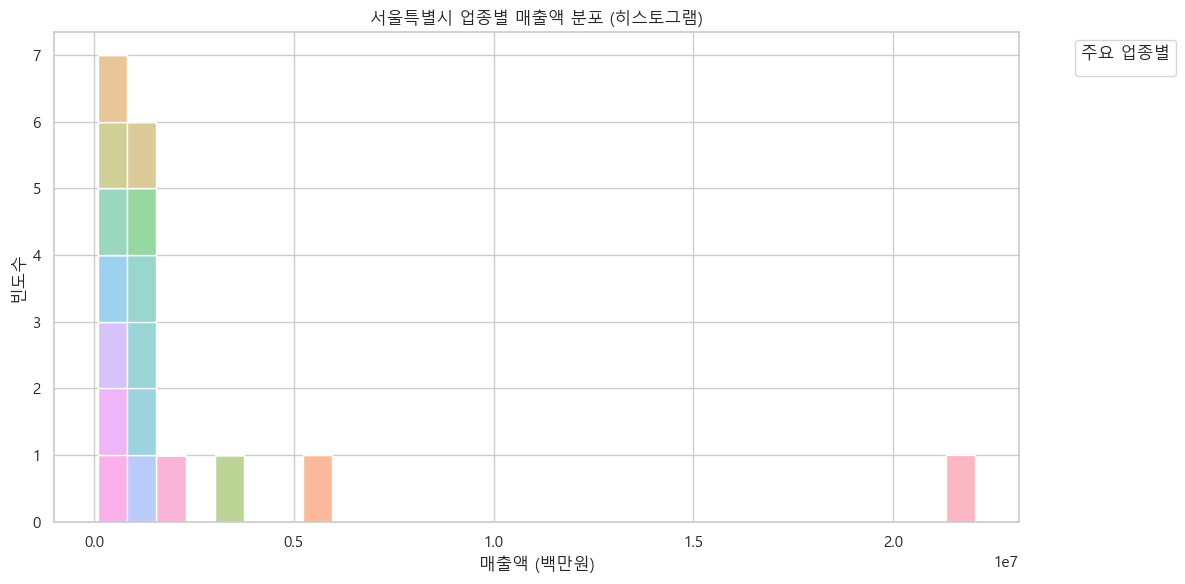

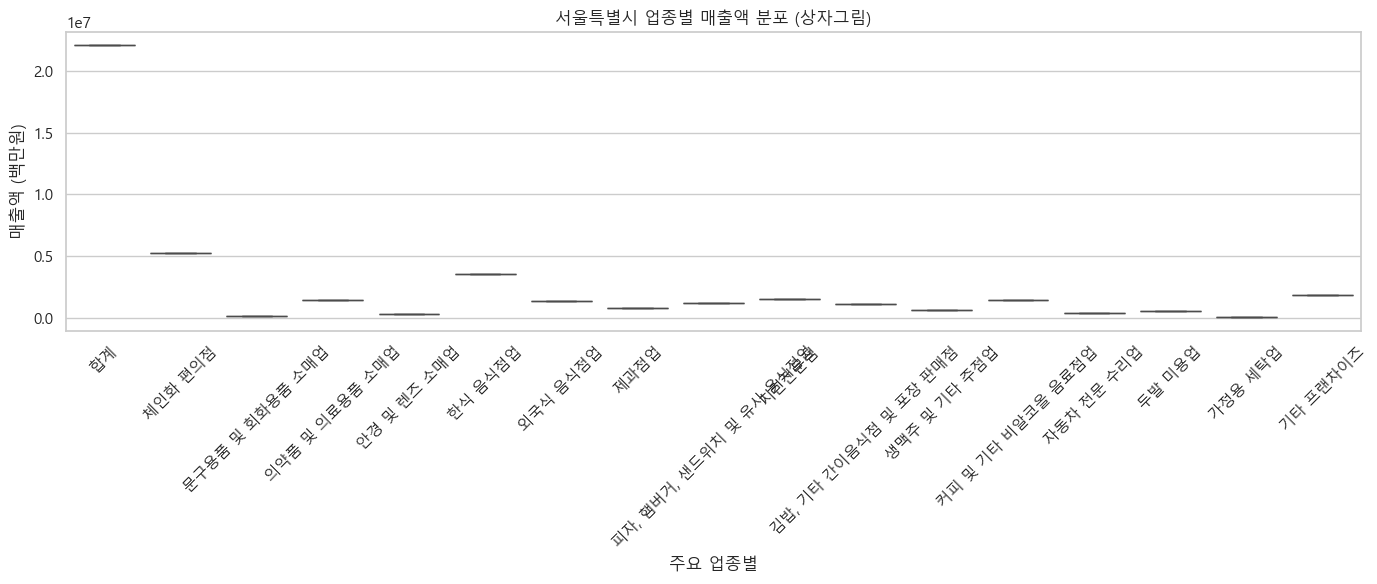

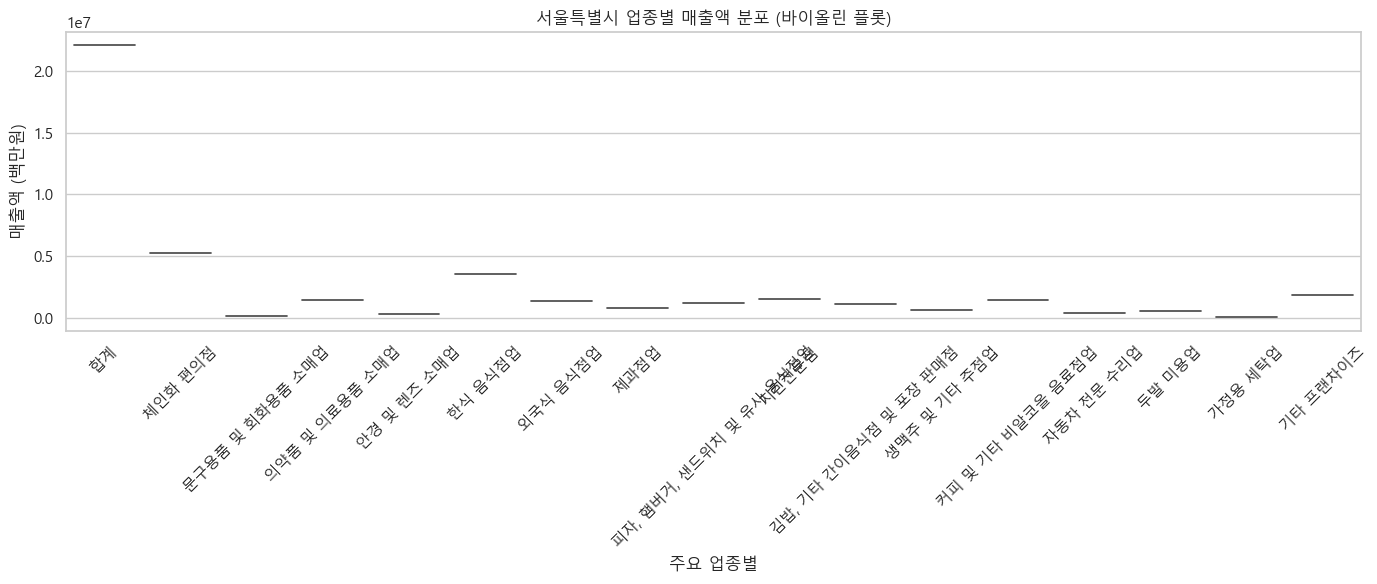

In [56]:
# 1. 히스토그램
plt.figure(figsize=(12,6))
sns.histplot(data=seoul_df, x="매출액 (백만원)", hue="주요 업종별", kde=True, multiple="stack")
plt.title("서울특별시 업종별 매출액 분포 (히스토그램)")
plt.xlabel("매출액 (백만원)")
plt.ylabel("빈도수")
plt.legend(title="주요 업종별", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2. 상자그림
plt.figure(figsize=(14,6))
sns.boxplot(data=seoul_df, x="주요 업종별", y="매출액 (백만원)")
plt.title("서울특별시 업종별 매출액 분포 (상자그림)")
plt.xlabel("주요 업종별")
plt.ylabel("매출액 (백만원)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. 바이올린 플롯
plt.figure(figsize=(14,6))
sns.violinplot(data=seoul_df, x="주요 업종별", y="매출액 (백만원)", inner="box")
plt.title("서울특별시 업종별 매출액 분포 (바이올린 플롯)")
plt.xlabel("주요 업종별")
plt.ylabel("매출액 (백만원)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 업종별 평균,중앙값 매출액 막대그래프 코드

C:\Users\NT551\AppData\Local\Temp\ipykernel_1516\1315134117.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_sales, x="주요 업종별", y="매출액 (백만원)", palette="viridis")


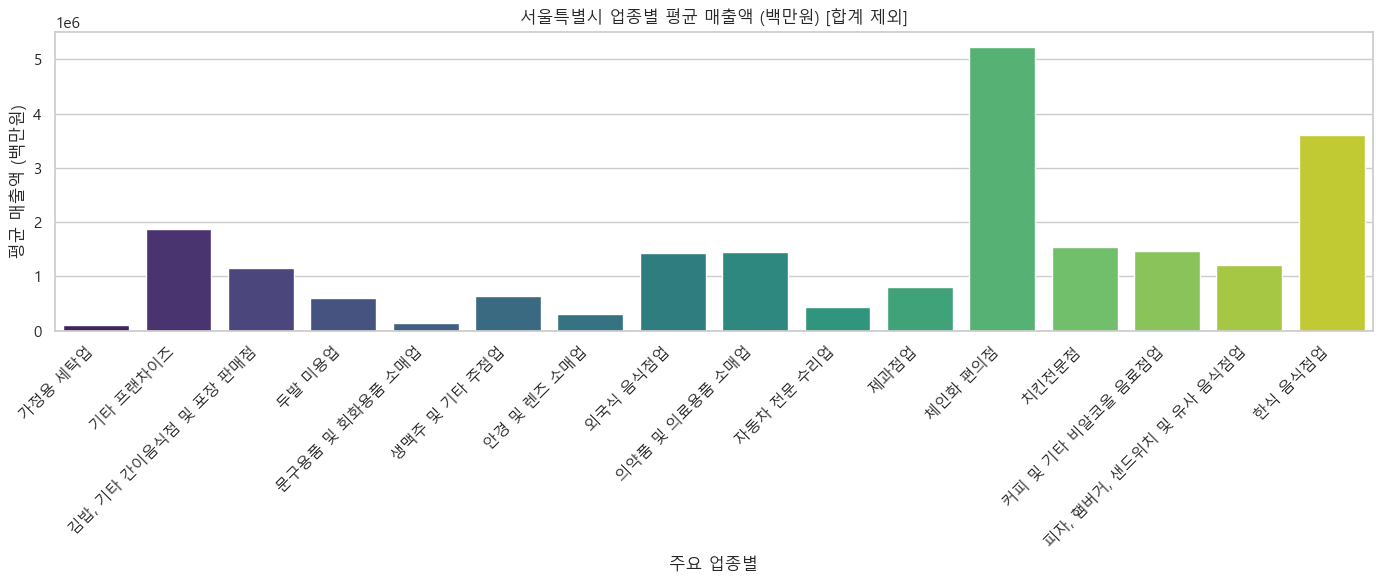

C:\Users\NT551\AppData\Local\Temp\ipykernel_1516\1315134117.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=median_sales, x="주요 업종별", y="매출액 (백만원)", palette="magma")


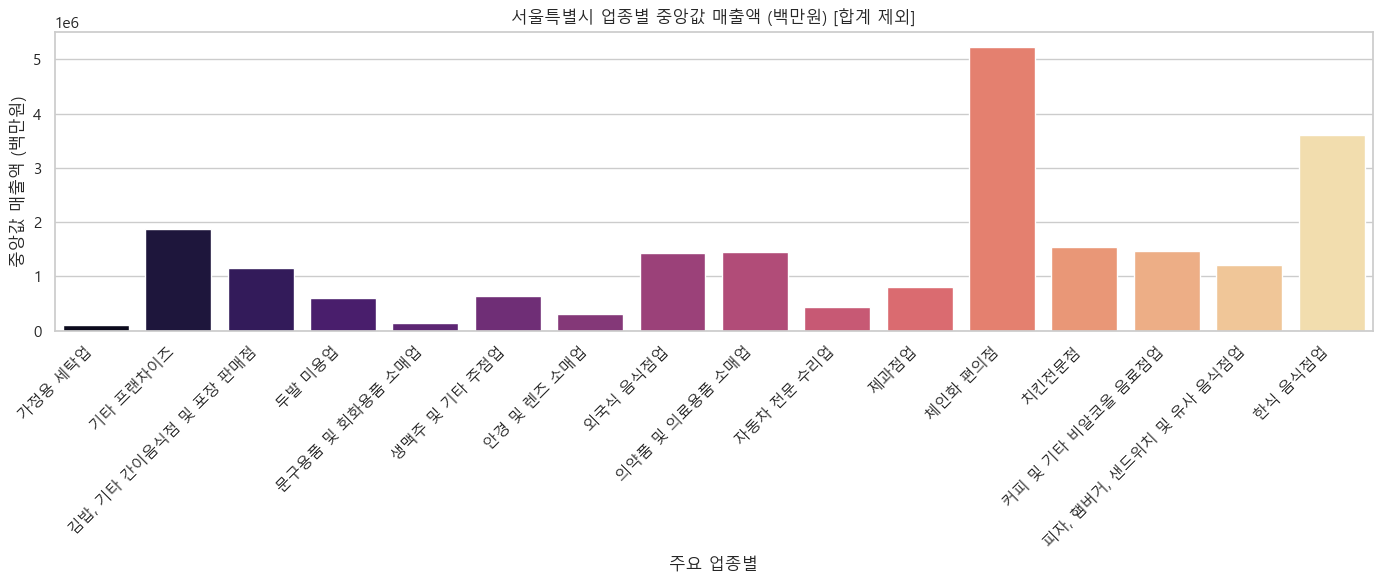

In [58]:
# seoul_df에는 ["시도별", "주요 업종별", "매출액 (백만원)"] 컬럼이 있다고 가정
# 1. "합계" 제외
filtered = seoul_df[seoul_df["주요 업종별"] != "합계"].copy()

# 2. 업종별 평균 매출액
mean_sales = filtered.groupby("주요 업종별")["매출액 (백만원)"].mean().reset_index()

# 3. 업종별 중앙값 매출액
median_sales = filtered.groupby("주요 업종별")["매출액 (백만원)"].median().reset_index()

# 4. 시각화 스타일
sns.set(style="whitegrid", font="Malgun Gothic")
plt.rcParams['axes.unicode_minus'] = False

# -----------------------------
# (1) 업종별 평균 매출액 막대그래프
plt.figure(figsize=(14,6))
sns.barplot(data=mean_sales, x="주요 업종별", y="매출액 (백만원)", palette="viridis")
plt.title("서울특별시 업종별 평균 매출액 (백만원) [합계 제외]")
plt.xlabel("주요 업종별")
plt.ylabel("평균 매출액 (백만원)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# -----------------------------
# (2) 업종별 중앙값 매출액 막대그래프
plt.figure(figsize=(14,6))
sns.barplot(data=median_sales, x="주요 업종별", y="매출액 (백만원)", palette="magma")
plt.title("서울특별시 업종별 중앙값 매출액 (백만원) [합계 제외]")
plt.xlabel("주요 업종별")
plt.ylabel("중앙값 매출액 (백만원)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### 서울특별시 업종별 1개 사업체당 매출액

아래 그래프는 업종별 “점포 하나당 평균 매출액” 을 비교해줍니다.
만약 업종별 사업체 수가 많아도 매출이 적으면 → 1개 사업체당 매출액이 낮게 나옵니다.
반대로 소수의 대형 업체(예: 대형마트, 제약판매업 등)는 → 1개 사업체당 매출액이 매우 높게 나타납니다.

C:\Users\NT551\AppData\Local\Temp\ipykernel_1516\4234131779.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_sales_per_store,


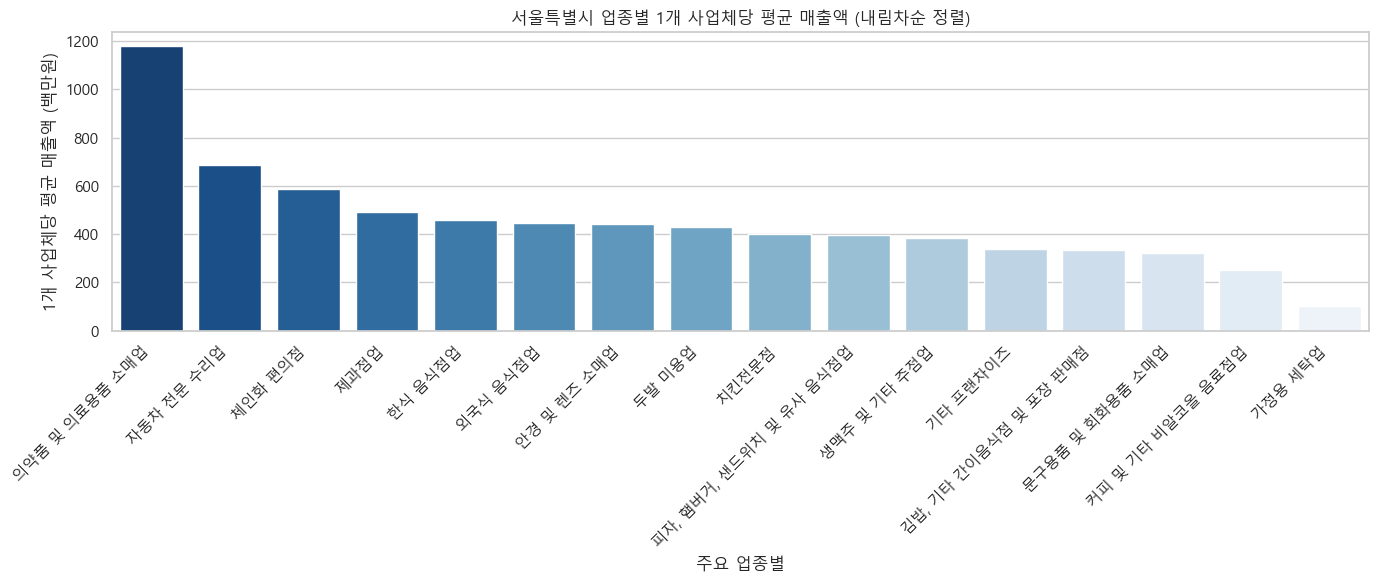

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 서울특별시 데이터 필터링
seoul_df = df[df["시도별"] == "서울특별시"].copy()

# 2. 숫자형 변환
cols = ["매출액 (백만원)", "사업체수 (개)"]
for col in cols:
    seoul_df[col] = pd.to_numeric(seoul_df[col], errors="coerce")

# 3. 1개 사업체당 매출액 계산
seoul_df["1개 사업체당 매출액 (백만원)"] = (
    seoul_df["매출액 (백만원)"] / seoul_df["사업체수 (개)"]
)

# 4. 업종별 평균 계산 (합계 제외) + 내림차순 정렬
avg_sales_per_store = (
    seoul_df[seoul_df["주요 업종별"] != "합계"]
    .groupby("주요 업종별")["1개 사업체당 매출액 (백만원)"]
    .mean()
    .reset_index()
    .sort_values("1개 사업체당 매출액 (백만원)", ascending=False)
)

# 5. 시각화
sns.set(style="whitegrid", font="Malgun Gothic")
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(14,6))
sns.barplot(data=avg_sales_per_store, 
            x="주요 업종별", y="1개 사업체당 매출액 (백만원)", 
            palette="Blues_r", order=avg_sales_per_store["주요 업종별"])
plt.title("서울특별시 업종별 1개 사업체당 평균 매출액 (내림차순 정렬)")
plt.xlabel("주요 업종별")
plt.ylabel("1개 사업체당 평균 매출액 (백만원)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### 업종별 1개 사업체당 순이익 막대그래프

C:\Users\NT551\AppData\Local\Temp\ipykernel_1516\1093988364.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_profit_per_store,


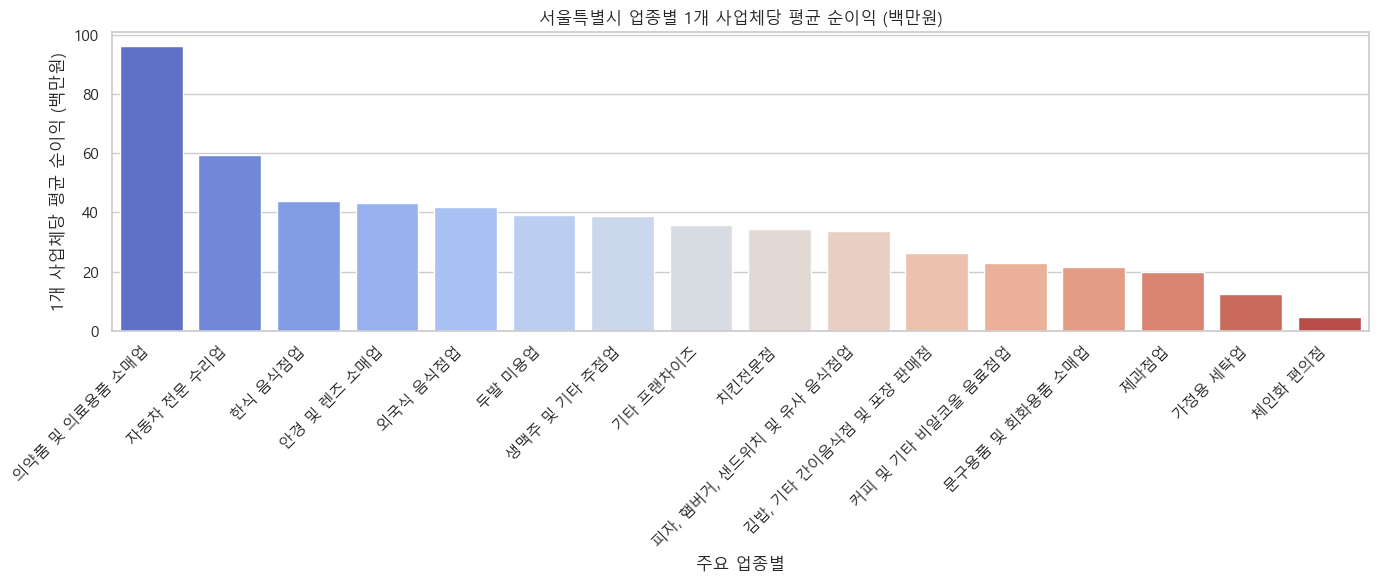

In [65]:
# 1. 서울특별시 데이터 필터링
seoul_df = df[df["시도별"] == "서울특별시"].copy()

# 2. 숫자형 변환
cols = ["매출액 (백만원)", "영업비용 (백만원)", "사업체수 (개)"]
for col in cols:
    seoul_df[col] = pd.to_numeric(seoul_df[col], errors="coerce")

# 3. 1개 사업체당 순이익 계산
seoul_df["1개 사업체당 순이익 (백만원)"] = (
    (seoul_df["매출액 (백만원)"] - seoul_df["영업비용 (백만원)"]) / seoul_df["사업체수 (개)"]
)

# 4. 업종별 평균 순이익 (합계 제외)
avg_profit_per_store = (
    seoul_df[seoul_df["주요 업종별"] != "합계"]
    .groupby("주요 업종별")["1개 사업체당 순이익 (백만원)"]
    .mean()
    .reset_index()
    .sort_values("1개 사업체당 순이익 (백만원)", ascending=False)
)

# 5. 시각화
sns.set(style="whitegrid", font="Malgun Gothic")
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(14,6))
sns.barplot(data=avg_profit_per_store, 
            x="주요 업종별", y="1개 사업체당 순이익 (백만원)", 
            palette="coolwarm")
plt.title("서울특별시 업종별 1개 사업체당 평균 순이익 (백만원)")
plt.xlabel("주요 업종별")
plt.ylabel("1개 사업체당 평균 순이익 (백만원)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

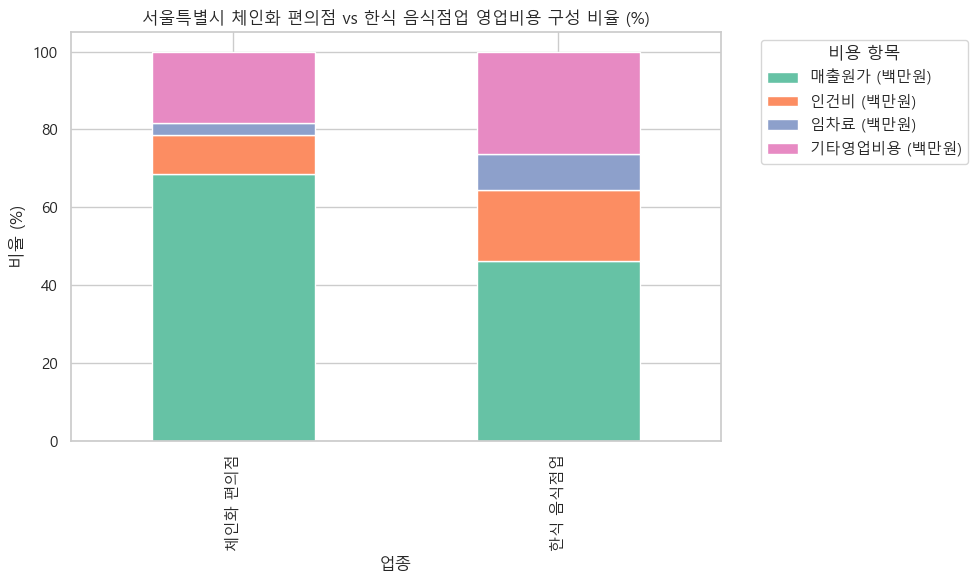

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 분석 대상 업종
target_industries = ["체인화 편의점", "한식 음식점업"]

# 2. 비용 항목
cols = ["매출원가 (백만원)", "인건비 (백만원)", "임차료 (백만원)", "기타영업비용 (백만원)"]

# 3. 업종별 비용 합계 데이터프레임 생성
cost_data = []
for industry in target_industries:
    store_df = df[(df["시도별"] == "서울특별시") & (df["주요 업종별"] == industry)].copy()
    
    # 숫자형 변환
    for col in cols:
        store_df[col] = pd.to_numeric(store_df[col], errors="coerce")

    # 항목별 합계
    costs = store_df[cols].sum().fillna(0)
    total = costs.sum()
    
    # 비율 계산
    if total > 0:
        cost_ratios = (costs / total * 100).to_dict()
        cost_ratios["업종"] = industry
        cost_data.append(cost_ratios)

cost_df = pd.DataFrame(cost_data)

# 4. 시각화 (스택 막대그래프)
colors = ["#66c2a5","#fc8d62","#8da0cb","#e78ac3"]

cost_df.set_index("업종")[cols].plot(kind="bar", stacked=True, color=colors, figsize=(10,6))

plt.title("서울특별시 체인화 편의점 vs 한식 음식점업 영업비용 구성 비율 (%)")
plt.ylabel("비율 (%)")
plt.xlabel("업종")
plt.legend(title="비용 항목", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

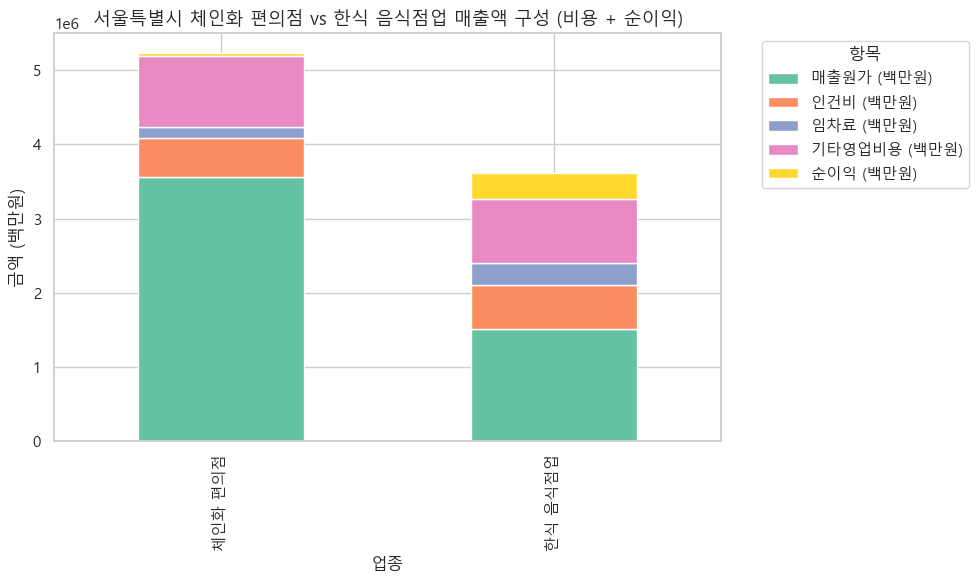

In [72]:
# 1. 분석 대상 업종
target_industries = ["체인화 편의점", "한식 음식점업"]

# 2. 필요한 컬럼
cols = ["매출액 (백만원)", "매출원가 (백만원)", "인건비 (백만원)", "임차료 (백만원)", "기타영업비용 (백만원)"]

# 3. 업종별 데이터 준비
plot_data = []
for industry in target_industries:
    df_ind = df[(df["시도별"] == "서울특별시") & (df["주요 업종별"] == industry)].copy()
    
    for col in cols:
        df_ind[col] = pd.to_numeric(df_ind[col], errors="coerce")
    
    # 합계 구하기
    total_sales = df_ind["매출액 (백만원)"].sum()
    cost_sum = df_ind["매출원가 (백만원)"].sum() + df_ind["인건비 (백만원)"].sum() + df_ind["임차료 (백만원)"].sum() + df_ind["기타영업비용 (백만원)"].sum()
    profit = total_sales - cost_sum
    
    plot_data.append({
        "업종": industry,
        "매출원가 (백만원)": df_ind["매출원가 (백만원)"].sum(),
        "인건비 (백만원)": df_ind["인건비 (백만원)"].sum(),
        "임차료 (백만원)": df_ind["임차료 (백만원)"].sum(),
        "기타영업비용 (백만원)": df_ind["기타영업비용 (백만원)"].sum(),
        "순이익 (백만원)": profit
    })

plot_df = pd.DataFrame(plot_data)
plot_df.set_index("업종", inplace=True)

# 4. 시각화 (매출액 대비 비용/순이익 구조 - 스택 막대)
colors = ["#66c2a5", "#fc8d62", "#8da0cb", "#e78ac3", "#ffd92f"]

plot_df.plot(kind="bar", stacked=True, figsize=(10,6), color=colors)

plt.title("서울특별시 체인화 편의점 vs 한식 음식점업 매출액 구성 (비용 + 순이익)", fontsize=13)
plt.ylabel("금액 (백만원)")
plt.xlabel("업종")
plt.legend(title="항목", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [75]:
# 1개 사업체당 순이익 = (매출액 - 영업비용) / 사업체수
seoul_df["1개 사업체당 순이익 (백만원)"] = (
    (seoul_df["매출액 (백만원)"] - seoul_df["영업비용 (백만원)"]) / seoul_df["사업체수 (개)"]
)

# 업종별 평균
profit_per_store = (
    seoul_df.groupby("주요 업종별")["1개 사업체당 순이익 (백만원)"].mean().reset_index()
)

print(profit_per_store.sort_values("1개 사업체당 순이익 (백만원)", ascending=False))

                     주요 업종별  1개 사업체당 순이익 (백만원)
8            의약품 및 의료용품 소매업          96.126521
9                자동차 전문 수리업          59.367347
15                  한식 음식점업          43.828662
6               안경 및 렌즈 소매업          43.274895
7                  외국식 음식점업          41.859813
3                    두발 미용업          39.102491
5              생맥주 및 기타 주점업          38.824202
1                  기타 프랜차이즈          35.707595
12                    치킨전문점          34.380866
14  피자, 햄버거, 샌드위치 및 유사 음식점업          33.757696
16                       합계          30.483090
2     김밥, 기타 간이음식점 및 포장 판매점          26.343228
13        커피 및 기타 비알코올 음료점업          22.871777
4           문구용품 및 회화용품 소매업          21.599129
10                     제과점업          19.998783
0                   가정용 세탁업          12.235110
11                  체인화 편의점           4.510800
